    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [1]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
I,А & B,мТл \\ \hline
0.16 & 204 \\ \hline
0.32 & 347 \\ \hline
0.48 & 575 \\ \hline
0.64 & 752 \\ \hline
0.8 & 911 \\ \hline
0.96 & 1009 \\ \hline
1.12 & 1078 \\ \hline
1.28 & 1123 \\ \hline



    А вот горизонтальная:

In [6]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, sep = '\n')

Введите данные:
\hline
I,\\ \hline
А & 0 & 0.16 & 0.32 & 0.48 & 0.64 & 0.8 & 0.96 & 1.12 & 1.28\\ \hline
U,\\ \hline
нВ & 480 & 760 & 1040 & 1240 & 1520 & 1720 & 1800 & 1880 & 1920


    Теперь основная часть:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt

In [8]:
def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return [k, b, sigma_k, sigma_b]

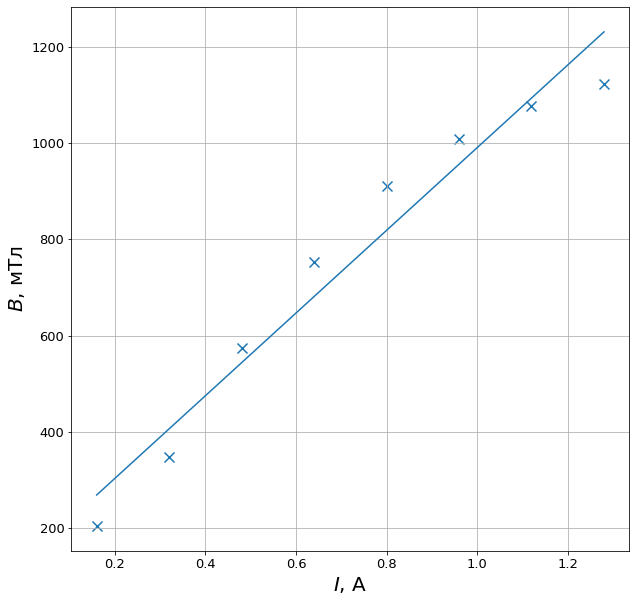

In [24]:
# константы
I_M = [0.16, 0.32, 0.48, 0.64, 0.8, 0.96, 1.12, 1.28]
B = [204, 347, 575, 752, 911, 1009, 1078, 1123]

k_B, b_B, sigma_k_B, sigma_b_B = MNK (I_M, B)

plt.rc('font', size = 13) 
fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (I_M, B,   marker = 'x', s = 100);
ax.plot ([I_M[0], I_M[-1]], [b_B + k_B * I_M[0], b_B + k_B * I_M[-1]]);

ax.set_xlabel('$I$, А',   fontsize = 20)
ax.set_ylabel('$B$, мТл', fontsize = 20)

ax.grid(True)
plt.savefig ("Picturies/B_I.pdf")

In [23]:
# Silver

U1 = list (map (float, input().split()))
U2 = list (map (float, input().split()))
U3 = list (map (float, input().split()))

k_U1, b_U1, sigma_k_U1, sigma_b_U1 = MNK (B, U1)
k_U2, b_U2, sigma_k_U2, sigma_b_U2 = MNK (B, U2)
k_U3, b_U3, sigma_k_U3, sigma_b_U3 = MNK (B, U3)

print ("U1:", k_U1, sigma_k_U1)
print ("U2:", k_U2, sigma_k_U2)
print ("U3:", k_U3, sigma_k_U3)

U1: 0.5493887347747862 0.02578847431778932
U2: 0.8628557665010619 0.018198792394865146
U3: 1.0503402236604422 0.026797845481568824


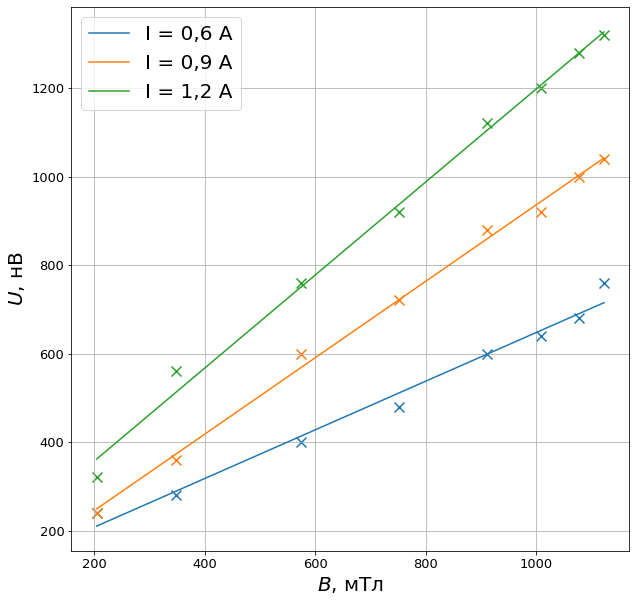

In [16]:
plt.rc('font', size = 13) 

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (B, U1, marker = 'x', s = 100);
ax.scatter (B, U2, marker = 'x', s = 100);
ax.scatter (B, U3, marker = 'x', s = 100);

ax.plot ([B[0], B[-1]], [b_U1 + k_U1 * B[0], b_U1 + k_U1 * B[-1]],  label = "I = 0,6 А");
ax.plot ([B[0], B[-1]], [b_U2 + k_U2 * B[0], b_U2 + k_U2 * B[-1]],  label = "I = 0,9 А");
ax.plot ([B[0], B[-1]], [b_U3 + k_U3 * B[0], b_U3 + k_U3 * B[-1]],  label = "I = 1,2 А");

""" ax.plot    ([const_start, const_end], [k1 * const_start + b1, k1 * const_end + b1], color = "red", label = "Эксперимент 1");
ax.scatter (data1.t[0:51], data1.lnP[0:51],     color = "red", marker = 'x');

ax.plot    ([const_start, const_end], [k2 * const_start + b2, k2 * const_end + b2], color = "blue", label = "Эксперимент 2");
ax.scatter (data2.t[0:51], data2.lnP[0:51],     color = "blue", marker = 'x');
 """

ax.set_xlabel('$B$, мТл', fontsize = 20)
ax.set_ylabel('$U$, нВ',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/Silver.pdf")

In [25]:
# zinc

Uz = list (map (float, input().split()))
Bz = [0] + B
k_Uz, b_Uz, sigma_k_Uz, sigma_b_Uz = MNK (Bz, Uz)

print ("Uz:", k_Uz, sigma_k_Uz)

Uz: 1.2769598674718117 0.03233476842307843


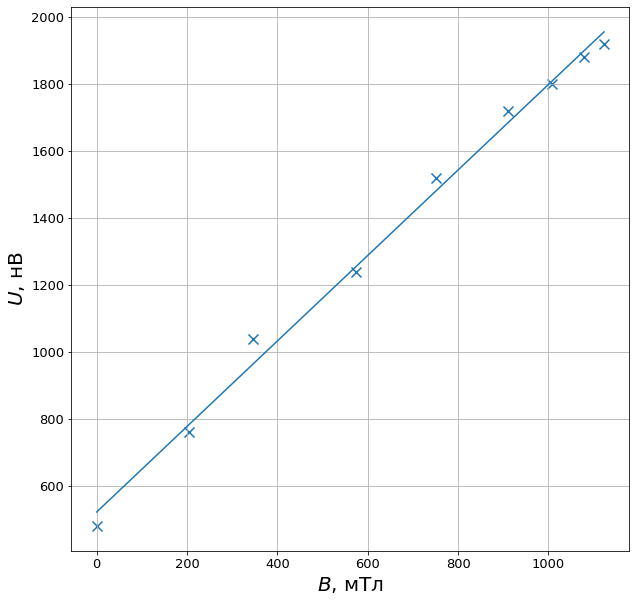

In [22]:
plt.rc('font', size = 13) 

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (Bz, Uz, marker = 'x', s = 100);
ax.plot ([Bz[0], Bz[-1]], [b_Uz + k_Uz * Bz[0], b_Uz + k_Uz * Bz[-1]]);

ax.set_xlabel('$B$, мТл', fontsize = 20)
ax.set_ylabel('$U$, нВ',  fontsize = 20)

ax.grid(True)
plt.savefig ("Picturies/Zinc.pdf")